In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [4]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [5]:
data.shape

(7920, 3)

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## Text Preprocessing

In [8]:
import re
import string

In [10]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

## Convert Uppercase to Lowercase

In [11]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [12]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

## Remove Links

In [13]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [14]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

## Remove Punctuations

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
data["tweet"] = data["tweet"].apply(remove_punctuations)

In [17]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [18]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

## Remove Numbers

In [19]:
data["tweet"] = data["tweet"].str.replace('\d+', '', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Ravindu Haputhanthri\AppData\Local\Temp\ipykernel_6048\910477839.py:1: SyntaxWarning: invalid escape sequence '\d'
  data["tweet"] = data["tweet"].str.replace('\d+', '', regex=True)


In [20]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

## Remove Stopwords

In [21]:
!pip install nltk

In [22]:
import nltk

In [23]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [25]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [27]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

## Stemming

In [28]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [29]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [30]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [31]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


## Building Vocabulary

In [32]:
from collections import Counter
vocab = Counter()

In [33]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [34]:
len(vocab)

15949

In [35]:
data.shape

(7920, 3)

## Since we need to convert this vocabulary to a vector array.
## The number of words in our vocabulary should be less than the number of records in our dataset to avoid overfitting.
## For that, we remove words, that the appearing count is less than 10 from our vocabulary

In [36]:
tokens = [key for key in vocab if vocab[key]>10]

In [37]:
len(tokens)

1145

In [38]:
def save_vocabulary(lines , filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding ="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/modelvocabulary.txt')

## Divide Dataset

In [39]:
x = data['tweet']
y = data['label']

In [40]:
!pip install scikit-learn

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [42]:
x_train.shape

(6336,)

In [43]:
x_test.shape

(1584,)

## Vectorization

In [44]:
def vectorizer(ds,vocabulary):
    vectorized_list = []

    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1

        vectorized_list.append(sentence_list)
    vectorized_list_new = np.asarray(vectorized_list, dtype=np.float32)
    return vectorized_list_new

In [45]:
vectorized_x_train = vectorizer(x_train,tokens)

In [46]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [47]:
vectorized_x_test = vectorizer(x_test,tokens)

In [48]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [83]:
y_train.value_counts()

label
0    4722
1    1614
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2425df3efc0>,
 [Text(-0.7495597609632438, 0.8050839488803171, 'Positive'),
  Text(0.7495597609632442, -0.8050839488803168, 'Negative')])

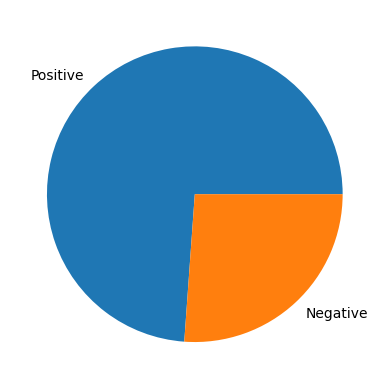

In [49]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels = ['Positive', 'Negative'])

## Handle Class Imbalance

In [50]:
!pip install imbalanced-learn

In [51]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9360, 1145) (9360,)


In [52]:
y_train_smote.value_counts()

label
0    4680
1    4680
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x24266925af0>,
 [Text(6.735557395310444e-17, 1.1, 'Positive'),
  Text(-2.0206672185931328e-16, -1.1, 'Negative')])

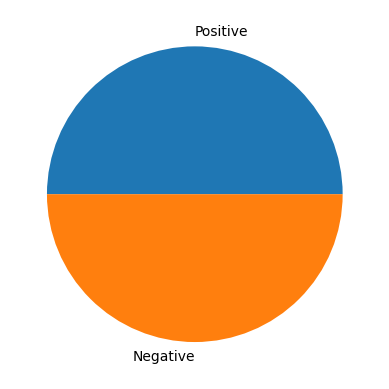

In [53]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels = ['Positive', 'Negative'])

In [90]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [91]:
y_train_smote

0       1
1       0
2       0
3       0
4       0
       ..
9439    1
9440    1
9441    1
9442    1
9443    1
Name: label, Length: 9444, dtype: int64

In [92]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [93]:
y_test

2685    1
6662    0
2335    0
605     0
3218    0
       ..
504     0
7822    0
5782    0
3772    0
3011    1
Name: label, Length: 1584, dtype: int64

## Model Training and Evaluation

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [55]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

## Logistic Regression

In [56]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)
y_train_pred = lr.predict(vectorized_x_train_smote)
y_test_pred = lr.predict(vectorized_x_test)
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.94
	Precision = 0.916
	Recall = 0.969
	F1-Score = 0.941
Testing Scores:
	Accuracy = 0.881
	Precision = 0.702
	Recall = 0.849
	F1-Score = 0.769


## Naive Bayes

In [57]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)
y_train_pred = mnb.predict(vectorized_x_train_smote)
y_test_pred = mnb.predict(vectorized_x_test)
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.907
	Precision = 0.869
	Recall = 0.959
	F1-Score = 0.912
Testing Scores:
	Accuracy = 0.869
	Precision = 0.658
	Recall = 0.911
	F1-Score = 0.764


## Decision Tree

In [58]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)
y_train_pred = dt.predict(vectorized_x_train_smote)
y_test_pred = dt.predict(vectorized_x_test)
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.842
	Precision = 0.68
	Recall = 0.608
	F1-Score = 0.642


## Random Forest

In [59]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)
y_train_pred = rf.predict(vectorized_x_train_smote)
y_test_pred = rf.predict(vectorized_x_test)
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 0.999
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.878
	Precision = 0.758
	Recall = 0.703
	F1-Score = 0.729


## Support Vector Machine

In [60]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.976
	Precision = 0.959
	Recall = 0.995
	F1-Score = 0.977
Testing Scores:
	Accuracy = 0.885
	Precision = 0.732
	Recall = 0.803
	F1-Score = 0.765


## Save The Model-Logistic Regression Comparing Accuracies

In [61]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)